# SVM On Three Data Sets

### In this notebook I will:
- load the .mat files with scipy.io
- perform feature scaling 
- visualize SVM with linear kernel and then Gaussian Kernel
- optimize hyper-perameters C and sigma with GridSearchCV
- plot validation curve to play around with values for C and sigma


In [1]:
# Setup environment
import scipy.io
import matplotlib.pyplot as plt 
import matplotlib
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
# read in data sets 
from scipy.io import loadmat
data1 = loadmat('ex6data1.mat')
data2 = loadmat('ex6data2.mat')
data3 = loadmat('ex6data3.mat')

X1, y1 = data1['X'], data1['y']
X2, y2 = data2['X'], data2['y']
X3, y3 = data3['X'], data3['y']
X = [X1, X2, X3]
y = [y1, y2, y3]

In [3]:
# scale features
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

for i in np.arange(0, 3):
#     scaler.fit(X[i])
#     X[i] = scaler.transform(X[i])
    X[i] = scaler.fit_transform(X[i])
    
X1, X2, X3 = X
y1, y2, y3 = y

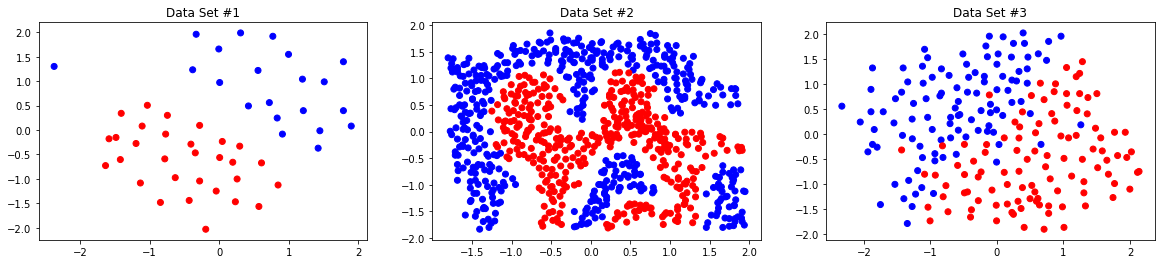

In [4]:
# Visualize 3 data sets
fig, axs = plt.subplots(figsize=[20, 4], nrows=1, ncols=3)

for i in np.arange(0, 3, 1):
    axs[i].scatter(X[i][:, 0], X[i][:, 1], color=["r" if y == 0 else "b" for y in y[i]])
    axs[i].set_title("Data Set #%i" % (i+1,))

In [4]:
# Try a linear kernel
from sklearn.svm import LinearSVC

clf_bias = LinearSVC(loss='hinge', C=1.0)
ytemp = y1.reshape(y1.shape[0],)
clf_bias.fit(X1, ytemp)

clf_variance = LinearSVC(loss='hinge', C=100, max_iter=2000)
clf_variance.fit(X1, ytemp)

LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=2000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [5]:
clf_bias.coef_, clf_bias.intercept_

(array([[1.32936066, 1.84953659]]), array([-0.56516766]))

In [6]:
# generating hypothesis function from coef_ and intercept_
for (intercept, coef) in zip(clf_bias.intercept_, clf_bias.coef_):
    s = "y = {0:.3f}".format(intercept)
    for (i, c) in enumerate(coef):
        s += " + {0:.3f} * x{1}".format(c, i)

    print(s)

y = -0.565 + 1.329 * x0 + 1.850 * x1


Text(0.5, 1.0, 'Data Set #2')

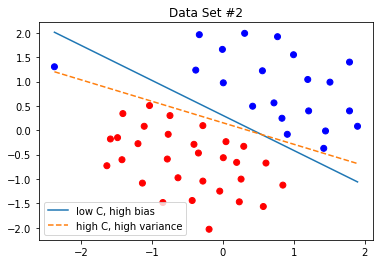

In [7]:
# Make line values from decision boundary lines
x1s = np.linspace(min(X1[:, 0]), max(X1[:, 0]), 20)
x2s_bias = (-clf_bias.intercept_ - clf_bias.coef_[0][0]*x1s) / clf_bias.coef_[0][1]
x2s_variance = (-clf_variance.intercept_ - clf_variance.coef_[0][0]*x1s) / clf_variance.coef_[0][1]

# visualize decision boundary 
fig, ax = plt.subplots()
ax.scatter(X1[:, 0], X1[:, 1], color=["r" if y == 0 else "b" for y in y1])
ax.plot(x1s, x2s_bias, label="low C, high bias")
ax.plot(x1s, x2s_variance, linestyle="--", label="high C, high variance")
ax.legend(loc="lower left")
ax.set_title("Data Set #%i" % (i+1,))

In [8]:
# Try a gaussian kernel
from sklearn.svm import SVC

ytemp = y2.reshape(y2.shape[0],)

clf_bias = SVC(kernel='rbf', C=1.0)
clf_bias.fit(X2, ytemp)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
clf_var = SVC(kernel='rbf', C=10000)
clf_var.fit(X2, ytemp)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
clf_bias.score(X2, ytemp), clf_var.score(X2, ytemp)

(0.9049826187717266, 0.996523754345307)

In [27]:
# Generate a set of points that form a grid over feature space
# Code for plotting from sdsawtelle on github
x1s = np.linspace(min(X2[:, 0]), max(X2[:, 0]), 600)
x2s = np.linspace(min(X2[:, 1]), max(X2[:, 1]), 600)
points = np.array([[x1, x2] for x1 in x1s for x2 in x2s])

# Compute decision function for each point, keep those which are close to the boundary
dist_bias = clf_bias.decision_function(points)
bounds_bias = np.array([pt for pt, dist in zip(points, dist_bias) if abs(dist)<0.05])

dist_var = clf_var.decision_function(points)
bounds_var = np.array([pt for pt, dist in zip(points, dist_var) if abs(dist)<0.05])

Text(0.5, 1.0, 'Overfit SVM with Gaussian Kernel')

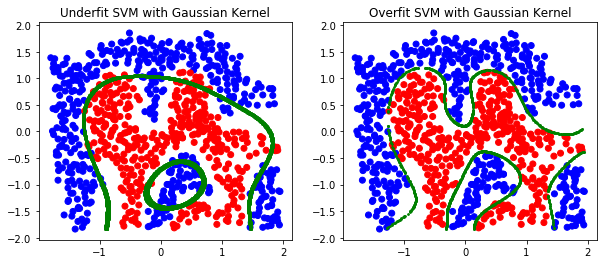

In [13]:
# Visualize the decision boundary
# Code from sdsawtelle on github
fig, [ax1, ax2] = plt.subplots(figsize=[10, 4], nrows=1, ncols=2)


ax1.scatter(X2[:, 0], X2[:, 1], color=["r" if y == 0 else "b" for y in y2], label="data")
ax1.scatter(bounds_bias[:, 0], bounds_bias[:, 1], color="g", s=3, label="decision boundary")
ax1.set_title("Underfit SVM with Gaussian Kernel")

ax2.scatter(X2[:, 0], X2[:, 1], color=["r" if y == 0 else "b" for y in y2], label="data")
ax2.scatter(bounds_var[:, 0], bounds_var[:, 1], color="g", s=3, label="decision boundary")
ax2.set_title("Overfit SVM with Gaussian Kernel")

In [16]:
# Optimize meta-perameters
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.linspace(0.1, 10, 100), 'gamma': np.linspace(0.001, 10, 100)}
ytemp = y3.reshape(y3.shape[0],)

clf = SVC(kernel='rbf')
search = GridSearchCV(estimator=clf, param_grid=parameters, cv=5)
search.fit(X3, ytemp)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7...
       7.273e+00, 7.374e+00, 7.475e+00, 7.576e+00, 7.677e+00, 7.778e+00,
       7.879e+00, 7.980e+00, 8.081e+00, 8.182e+00, 8.283e+00, 8.384e+00,
       8.485e+00, 8.586e+00, 8.687e+00, 8.788e+00, 8.889e+00, 8.990e+00,
       9.091e+00, 9.192e+00, 9.293e+00, 9.394e+00, 9.495e+00, 9.596e+00,
       9.697e+00, 9.798e+00, 9.899e+00, 1.000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [17]:
print("Best parameter values:", search.best_params_)
print("CV Score with best parameter values:", search.best_score_)

Best parameter values: {'C': 6.8, 'gamma': 1.213}
CV Score with best parameter values: 0.9241706161137441


In [20]:
df = pd.DataFrame(search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001945,0.000383,0.000881,0.000212,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.860465,0.500000,0.500000,0.500000,0.500000,0.573460,0.145201,9992
1,0.001009,0.000128,0.000496,0.000227,0.1,0.102,"{'C': 0.1, 'gamma': 0.10200000000000001}",0.860465,0.928571,0.976190,0.833333,0.666667,0.853081,0.105627,8798
2,0.000997,0.000267,0.000395,0.000051,0.1,0.203,"{'C': 0.1, 'gamma': 0.203}",0.883721,0.928571,0.976190,0.833333,0.714286,0.867299,0.089736,6572
3,0.000854,0.000023,0.000378,0.000019,0.1,0.304,"{'C': 0.1, 'gamma': 0.30400000000000005}",0.906977,0.928571,0.976190,0.833333,0.642857,0.857820,0.116599,8395
4,0.001563,0.000417,0.000625,0.000178,0.1,0.405,"{'C': 0.1, 'gamma': 0.405}",0.906977,0.928571,0.976190,0.857143,0.690476,0.872038,0.098235,5971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.001913,0.000176,0.000403,0.000053,10,9.596,"{'C': 10.0, 'gamma': 9.596}",0.883721,0.952381,0.880952,0.738095,0.714286,0.834123,0.091737,9793
9996,0.002202,0.000499,0.000454,0.000109,10,9.697,"{'C': 10.0, 'gamma': 9.697000000000001}",0.883721,0.952381,0.880952,0.738095,0.714286,0.834123,0.091737,9793
9997,0.003087,0.000373,0.000927,0.000284,10,9.798,"{'C': 10.0, 'gamma': 9.798}",0.883721,0.952381,0.880952,0.738095,0.714286,0.834123,0.091737,9793
9998,0.003112,0.000273,0.001001,0.000405,10,9.899,"{'C': 10.0, 'gamma': 9.899000000000001}",0.883721,0.952381,0.880952,0.738095,0.714286,0.834123,0.091737,9793


Text(0.5, 1.0, 'Grid Search Optimized SVM')

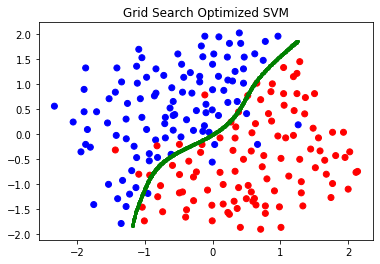

In [28]:
clf = search.best_estimator_
ytemp = y3.reshape(y3.shape[0],)
clf.fit(X3, ytemp)

# Evaluate decision function for each point 
boundary = clf.decision_function(points)
bounds = np.array([pt for pt, dist in zip(points, boundary) if abs(dist)<0.05])

fig, ax = plt.subplots()

ax.scatter(X3[:, 0], X3[:, 1], color=["r" if y == 0 else "b" for y in y3], label="data")
ax.scatter(bounds[:, 0], bounds[:, 1], color="g", s=3, label="decision boundary")
ax.set_title("Grid Search Optimized SVM")
